In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
import numpy as np

## Non-deep Learning model

### Data Analysis and Preprocessing

In [2]:
data = pd.read_csv('Taiwanes_ Bankruptcy_Prediction.csv')

# Display the first few rows of the dataset and basic information
data.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


The dataset contains various financial ratios and attributes for Taiwanese companies, including a binary 'Bankrupt?' label that indicates whether a company went bankrupt. Here are some observations and next steps:

Data Structure: The dataset has numerous financial features (95 features), most of which appear to be normalized (ranging from 0 to 1), based on the summary statistics.
Balancing: From the preview, we see that there are entries for bankrupt companies. We'll need to check the balance of the classes to see if there's a significant skew.

In [4]:
# Check for missing values in the dataset
data.isnull().any().sum()

0

There are no missing values in any of the columns of the dataset, so we don't need to handle missing data.

In [5]:
# Check class balance for the 'Bankrupt?' column
class_balance = data['Bankrupt?'].value_counts(normalize=True)

class_balance

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

The dataset is highly imbalanced with significantly more instances of non-bankrupt companies than bankrupt ones. This imbalance needs to be addressed during the modeling phase to prevent biased predictions towards the majority class.

In [6]:
# Define features and target
X = data.drop(columns='Bankrupt?')
y = data['Bankrupt?']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Random Forest Classifier

I decided to try using a Random Forest classifier, which is well-suited for handling imbalanced datasets and can provide good performance without the need for extensive data scaling. Random Forest is also beneficial as it naturally handles feature interactions and can provide insight into feature importance.

In [8]:
# Initialize the Random Forest classifier with class weight balanced
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [9]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

print(rf_conf_matrix)

[[1316    4]
 [  36    8]]


In [10]:
print(rf_classification_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.67      0.18      0.29        44

    accuracy                           0.97      1364
   macro avg       0.82      0.59      0.64      1364
weighted avg       0.96      0.97      0.96      1364



Classification Report:

Precision for non-bankrupt cases (0) is very high at 0.97, and for bankrupt cases (1) it is 0.67.

Recall for non-bankrupt cases is almost perfect at 1.00, while it is quite low for bankrupt cases at 0.18, indicating that while the model is excellent at identifying non-bankrupt cases, it struggles significantly with detecting bankrupt ones.

F1-Score reflects these trends, with a very high score for non-bankrupt cases (0.99) and a much lower score for bankrupt cases (0.29.

The model is highly effective at predicting the majority class (non-bankrupt) but less effective at correctly identifying the minority class (bankrupt). The improvement in precision for the bankrupt class suggests that when the model predicts bankruptcy, it is usually correct, although it does not identify many such cases (low recall).


In [11]:
# Parameters grid for tuning
param_grid = {
    'n_estimators': [100, 150],  # fewer estimators
    'max_depth': [None, 10],  # limiting depth to None and 10
    'min_samples_split': [2],  # keeping it simple with the default split
    'min_samples_leaf': [1]    # default leaf
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
                                      param_grid=param_grid, 
                                      scoring='recall',  # focus on recall for the minority class
                                      cv=2,  # reducing the number of folds to 2
                                      verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best recall
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

print(best_params)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [12]:
print(best_recall)

0.3977272727272727


Best Parameters Found:
Max Depth: 10
Min Samples Leaf: 1
Min Samples Split: 2
Number of Estimators: 100

Best Recall Score:
Recall for the minority class (bankrupt cases): Approximately 0.40
These results suggest that the model with a maximum tree depth of 10 and 100 trees in the forest offers the best recall among the tested configurations.

In [13]:
# Initialize the Random Forest classifier with the best parameters
tuned_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                  max_depth=best_params['max_depth'],
                                  min_samples_split=best_params['min_samples_split'],
                                  min_samples_leaf=best_params['min_samples_leaf'],
                                  class_weight='balanced',
                                  random_state=42)

# Train the model with the best parameters
tuned_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_tuned_rf = tuned_rf.predict(X_test)

# Evaluate the tuned model
tuned_rf_conf_matrix = confusion_matrix(y_test, y_pred_tuned_rf)
tuned_rf_classification_report = classification_report(y_test, y_pred_tuned_rf)

print(tuned_rf_conf_matrix)

[[1287   33]
 [  18   26]]


In [14]:
print(tuned_rf_classification_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.44      0.59      0.50        44

    accuracy                           0.96      1364
   macro avg       0.71      0.78      0.74      1364
weighted avg       0.97      0.96      0.97      1364



Classification Report:

Precision for non-bankrupt cases (0) remains high at 0.99, and for bankrupt cases (1), it is 0.44.

Recall for non-bankrupt cases is excellent at 0.97, while the recall for bankrupt cases has improved to 0.59, which is a significant improvement over the previous model.

F1-Score for the bankrupt class has improved to 0.50, reflecting a better balance between precision and recall.

## Deep learning model

In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
154/154 [==============================] - 1s 1ms/step - loss: 0.1998 - accuracy: 0.9556 - val_loss: 0.1158 - val_accuracy: 0.9615
Epoch 2/10
154/154 [==============================] - 0s 667us/step - loss: 0.0972 - accuracy: 0.9699 - val_loss: 0.1013 - val_accuracy: 0.9579
Epoch 3/10
154/154 [==============================] - 0s 649us/step - loss: 0.0812 - accuracy: 0.9717 - val_loss: 0.1027 - val_accuracy: 0.9597
Epoch 4/10
154/154 [==============================] - 0s 631us/step - loss: 0.0728 - accuracy: 0.9739 - val_loss: 0.0959 - val_accuracy: 0.9579
Epoch 5/10
154/154 [==============================] - 0s 645us/step - loss: 0.0687 - accuracy: 0.9747 - val_loss: 0.0986 - val_accuracy: 0.9560
Epoch 6/10
154/154 [==============================] - 0s 622us/step - loss: 0.0646 - accuracy: 0.9766 - val_loss: 0.1012 - val_accuracy: 0.9579
Epoch 7/10
154/154 [==============================] - 0s 612us/step - loss: 0.0611 - accuracy: 0.9774 - val_loss: 0.1005 - val_accuracy: 0

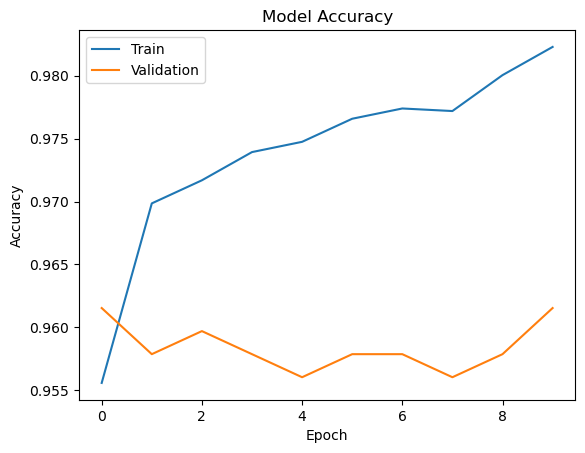

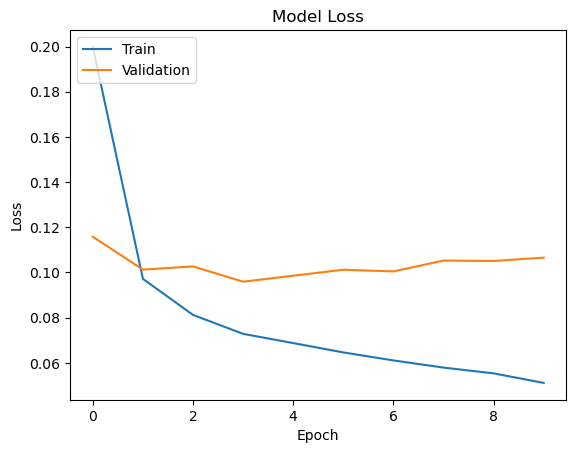

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Analysis of Plots

Model Accuracy:

The training accuracy remains relatively stable and high throughout the epochs, which is a good sign of the model’s performance on the training set.
The validation accuracy appears quite volatile, indicating variability in the model's performance on data it hasn't seen before. This could suggest overfitting or an inadequate model architecture for the complexity of the data.

Model Loss:

The training loss decreases sharply and then flattens out, which is typical and indicates that the model is learning effectively from the training data.
The validation loss, however, trends upwards after an initial drop. This is a classic indication of overfitting, where the model learns the training data too well, including the noise and fluctuations that do not generalize to new data.

In [19]:
# Rebuild the model with dropout and regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Recompile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# Fit the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stopping_monitor])


Epoch 1/30
154/154 [==============================] - 1s 1ms/step - loss: 1.0249 - accuracy: 0.9483 - val_loss: 0.6087 - val_accuracy: 0.9615
Epoch 2/30
154/154 [==============================] - 0s 718us/step - loss: 0.4866 - accuracy: 0.9684 - val_loss: 0.3535 - val_accuracy: 0.9615
Epoch 3/30
154/154 [==============================] - 0s 714us/step - loss: 0.3028 - accuracy: 0.9688 - val_loss: 0.2431 - val_accuracy: 0.9615
Epoch 4/30
154/154 [==============================] - 0s 707us/step - loss: 0.2176 - accuracy: 0.9678 - val_loss: 0.1935 - val_accuracy: 0.9615
Epoch 5/30
154/154 [==============================] - 0s 683us/step - loss: 0.1749 - accuracy: 0.9686 - val_loss: 0.1579 - val_accuracy: 0.9634
Epoch 6/30
154/154 [==============================] - 0s 699us/step - loss: 0.1536 - accuracy: 0.9678 - val_loss: 0.1430 - val_accuracy: 0.9615
Epoch 7/30
154/154 [==============================] - 0s 678us/step - loss: 0.1355 - accuracy: 0.9694 - val_loss: 0.1328 - val_accuracy: 0

In [24]:
# Predict class probabilities for the test set
probabilities = model.predict(X_test_scaled)[:, 0]  # Assuming the bankruptcy class is at index 0

# Define a range of thresholds to test
thresholds = np.arange(0.05, 0.6, 0.05)  # Adjust the range and step as needed

# Print performance metrics for each threshold
for threshold in thresholds:
    # Apply the threshold to convert probabilities to binary predictions
    predictions = (probabilities > threshold).astype(int)
    
    # Calculate and print the confusion matrix and classification report
    cm = confusion_matrix(y_test, predictions)
    cr = classification_report(y_test, predictions, target_names=['Non-Bankrupt', 'Bankrupt'])
    
    print(f"Threshold: {threshold:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)
    print("\n" + "-"*80)  # Print a separator line

43/43 [==============================] - 0s 423us/step
Threshold: 0.05
Confusion Matrix:
[[1206  114]
 [  13   31]]

Classification Report:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.91      0.95      1320
    Bankrupt       0.21      0.70      0.33        44

    accuracy                           0.91      1364
   macro avg       0.60      0.81      0.64      1364
weighted avg       0.96      0.91      0.93      1364


--------------------------------------------------------------------------------
Threshold: 0.10
Confusion Matrix:
[[1253   67]
 [  17   27]]

Classification Report:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.95      0.97      1320
    Bankrupt       0.29      0.61      0.39        44

    accuracy                           0.94      1364
   macro avg       0.64      0.78      0.68      1364
weighted avg       0.96      0.94      0.95      1364


--------------------------------------

Lower Thresholds (0.10 to 0.20):

Higher Recall for Bankrupt Class: Lower thresholds (especially 0.10 and 0.15) increase recall significantly, indicating the model identifies more true bankrupt cases.
Decreased Precision: As expected, lower thresholds result in decreased precision, leading to more false positives (non-bankrupt companies incorrectly classified as bankrupt).

Mid-Range Thresholds (0.25 to 0.35):

Balanced Metrics: These thresholds provide a balance, with a moderate recall and slightly better precision for the bankrupt class.
Practical Usability: For practical applications, a threshold in this range might provide the best balance between missing fewer bankruptcies and maintaining reasonable accuracy.

Higher Thresholds (0.40 to 0.55):

Decreasing Recall: As the threshold increases, the recall for the bankrupt class decreases markedly, showing that fewer bankrupt cases are detected.
Increasing Precision: Precision improves slightly, but the number of true positives becomes very low, indicating the model becomes too conservative in predicting bankruptcy.

The recall for bankrupt predictions is more critical in this context since missing out on identifying a bankrupt company could be costly. Efforts to maintain or improve recall should be prioritized even if it might come at the cost of reduced precision.

In [21]:
# Predict probabilities
probabilities = model.predict(X_test_scaled)

# Apply the 0.15 threshold to make final predictions
predictions = (probabilities > 0.15).astype(int)

43/43 [==============================] - 0s 462us/step


In [22]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[1274   46]
 [  22   22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1320
           1       0.32      0.50      0.39        44

    accuracy                           0.95      1364
   macro avg       0.65      0.73      0.68      1364
weighted avg       0.96      0.95      0.96      1364



Classification Report:

Precision:

Similar to Random Forest, the precision for non-bankrupt cases remains high at 0.98. However, the precision for bankrupt cases is significantly lower at 0.32. This indicates that while the model is very reliable in predicting non-bankrupt companies, its predictions for bankrupt companies are less dependable, with a considerable number of false positives.

Recall:

For bankrupt cases, the recall has improved to 0.50. This demonstrates that the model has become more sensitive in identifying bankrupt companies, capturing over half of all actual bankrupt cases.

F1-Score:

The F1-score for bankrupt cases stands at 0.39, reflecting ongoing challenges in balancing precision and recall. This score suggests that while the model's ability to detect bankrupt companies has improved in terms of recall, the precision remains a challenge, impacting the overall F1-score negatively.

### Comparison

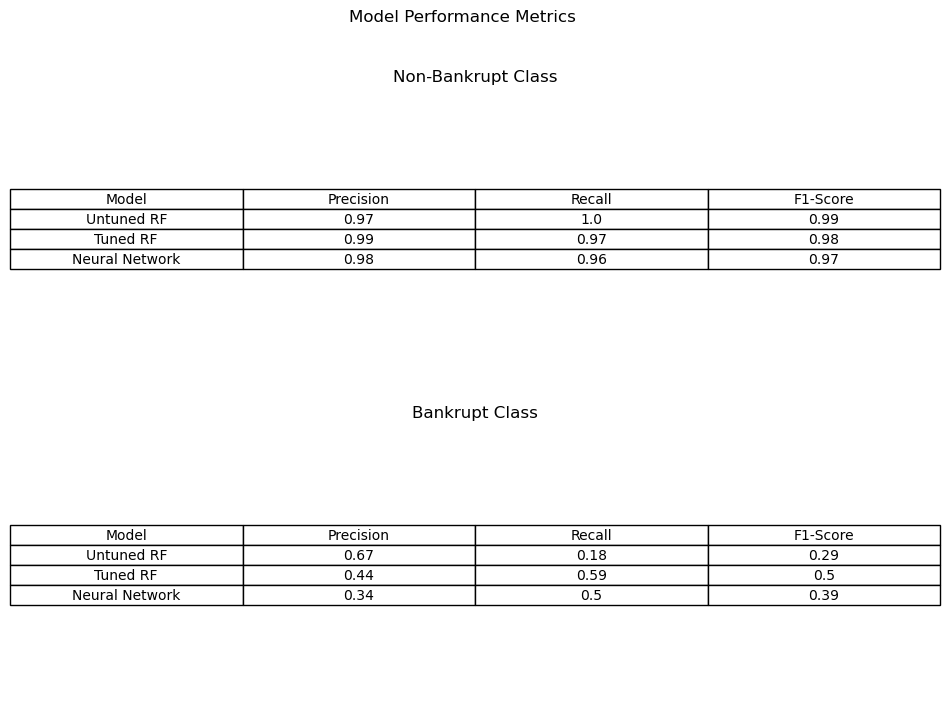

In [25]:
# Define the performance metrics for each model
models = ['Untuned RF', 'Tuned RF', 'Neural Network']
precision_nb = [0.97, 0.99, 0.98]
recall_nb = [1.00, 0.97, 0.96]
f1_score_nb = [0.99, 0.98, 0.97]

precision_b = [0.67, 0.44, 0.34]
recall_b = [0.18, 0.59, 0.50]
f1_score_b = [0.29, 0.50, 0.39]

# Create DataFrames
results_nb = pd.DataFrame({
    'Model': models,
    'Precision': precision_nb,
    'Recall': recall_nb,
    'F1-Score': f1_score_nb
})

results_b = pd.DataFrame({
    'Model': models,
    'Precision': precision_b,
    'Recall': recall_b,
    'F1-Score': f1_score_b
})

# Display the tables
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Model Performance Metrics')

# Table for Non-Bankrupt Class
axs[0].axis('tight')
axs[0].axis('off')
table_nb = axs[0].table(cellText=results_nb.values, colLabels=results_nb.columns, cellLoc='center', loc='center')
table_nb.auto_set_font_size(False)
table_nb.set_fontsize(10)
table_nb.scale(1.2, 1.2)
axs[0].set_title('Non-Bankrupt Class')

# Table for Bankrupt Class
axs[1].axis('tight')
axs[1].axis('off')
table_b = axs[1].table(cellText=results_b.values, colLabels=results_b.columns, cellLoc='center', loc='center')
table_b.auto_set_font_size(False)
table_b.set_fontsize(10)
table_b.scale(1.2, 1.2)
axs[1].set_title('Bankrupt Class')

plt.show()


Non-Bankrupt Class: All models perform well with high precision and recall, indicating reliable pre-
dictions for non-bankrupt companies. Bankrupt Class: The tuned Random Forest and Neural Network
models show improved recall compared to Untuned Random Forest, demonstrating better sensitivity in
detecting bankrupt companies. In conclusion, the tuned Random Forest and Neural Network models
are more effective in balancing the trade-off between precision and recall for the bankrupt class. The
recall for bankrupt predictions is more critical in this context since missing out on identifying a bankrupt
company could be costly. Therefore, efforts to maintain or improve recall were prioritized.